In [254]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.linear_model import LogisticRegression , Perceptron , SGDClassifier
from sklearn.svm import SVC , LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# Model Preprocessing
from sklearn.preprocessing import LabelEncoder

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Allow multiple results from each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Remove warnings
import warnings
warnings.filterwarnings("ignore")

# Data ingestion and Understanding

In [255]:
data = pd.read_csv("./train.csv")
test= pd.read_csv("./test.csv")
ss = pd.read_csv("./gender_submission.csv")

In [256]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [257]:
 data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [258]:
data.columns = [x.lower() for x in data.columns]
test.columns = [x.lower() for x in test.columns]
ss.columns = [x.lower() for x in ss.columns]

In [259]:
data.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [261]:
data.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [262]:
data.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [263]:
data.shape

(891, 12)

# Univariate analysis

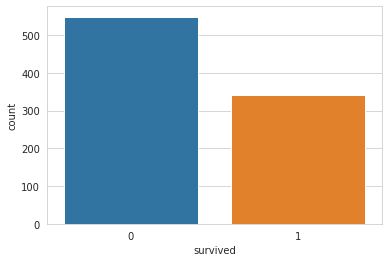

In [264]:
sns.set_style("whitegrid")
sns.countplot(x="survived",data=data)

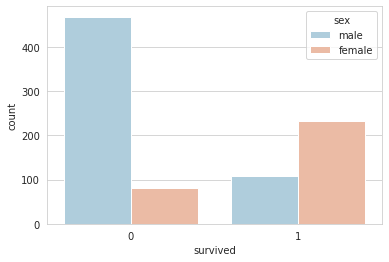

In [265]:
sns.countplot(x="survived" , hue="sex" ,data=data ,palette ="RdBu_r")

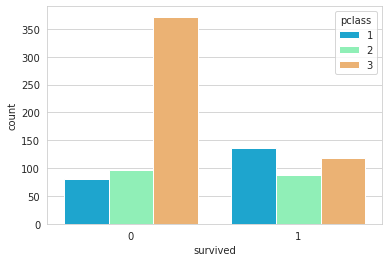

In [266]:
sns.countplot(x="survived", hue="pclass" , data=data , palette="rainbow")

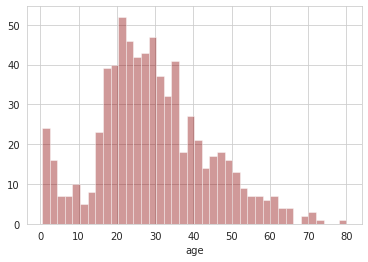

In [267]:
sns.distplot(data["age"].dropna(),kde=False ,color="darkred",bins=40) 

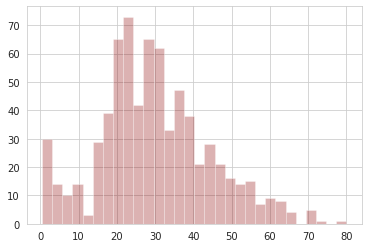

In [268]:
## Same as the above function
data["age"].hist(bins=30,color="darkred",alpha=0.3)

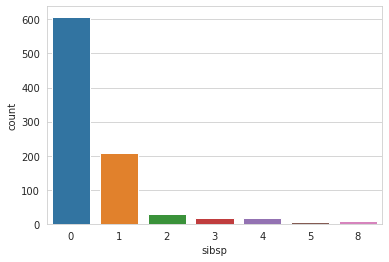

In [269]:
sns.countplot(x="sibsp",data=data)

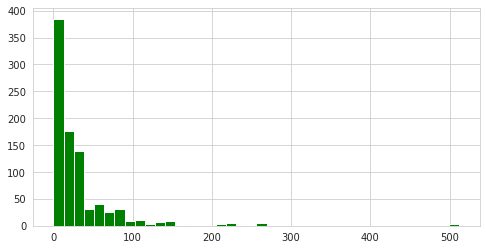

In [270]:
data["fare"].hist(color="green",bins=40,figsize=(8,4))

# Categorical Variable analysis

Categorical values are values that have no intrinsic ordering thus does make sense to calculate things like average on them

#### *Categorical variable:sex*

In [271]:
data["sex"].value_counts(dropna=False)

male      577
female    314
Name: sex, dtype: int64

In [272]:
data[["sex","survived"]].groupby("sex",as_index=False).mean().sort_values(by="survived",ascending=False)
## Females have a better chance of survivel

,sex,survived
0,female,0.742038
1,male,0.188908


Text(0, 0.5, 'Survival Probability')

Text(0.5, 1.0, 'Survival Probability by Gender')

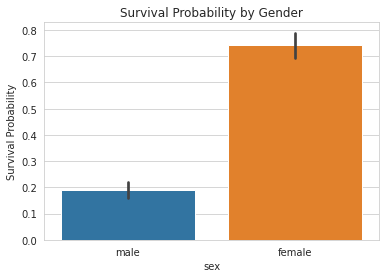

In [273]:
sns.barplot(x="sex",y="survived" , data=data)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Gender")

#### *Categorical variable:pclass*

In [274]:
data["pclass"].value_counts(dropna=False)

3    491
1    216
2    184
Name: pclass, dtype: int64

In [275]:
data[["pclass","survived"]].groupby("pclass",as_index=False).mean().sort_values(by="survived",ascending=False)
## First class have a better chance of survivel

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0, 0.5, 'Survival Probability')

Text(0.5, 1.0, 'Survival Probability by pclass')

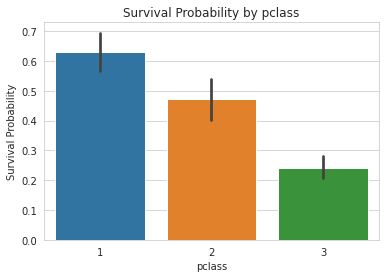

In [276]:
sns.barplot(x="pclass",y="survived" ,data=data)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by pclass")

Text(0, 0.5, 'Survival Probability')

Text(0.5, 1.0, 'Survival Probability by Passenger age and Passenger class')

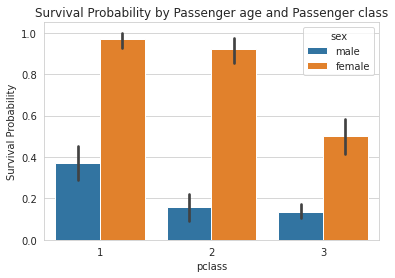

In [277]:
sns.barplot(x="pclass",y="survived" ,hue="sex",data=data)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Passenger age and Passenger class")
## Females always have a better chance of survival and even better when in the higher passenger class.

#### *Categorical variable:embarked*

In [278]:
data["embarked"].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

In [279]:
data[["embarked","survived"]].groupby("embarked",as_index=False).mean().sort_values(by="survived",ascending=False)

,embarked,survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0, 0.5, 'Survival Probability')

Text(0.5, 1.0, 'Survival Probability by Embarkation')

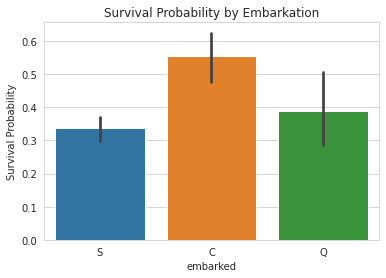

In [280]:
sns.barplot(x="embarked",y="survived" ,data=data)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Embarkation")
## Point C has has the highest probability of survival

Why is there high probability of survival in C than in the others. Are this embarkation points related to class maybe or gender? Lets test this hypothesis using a factor plot

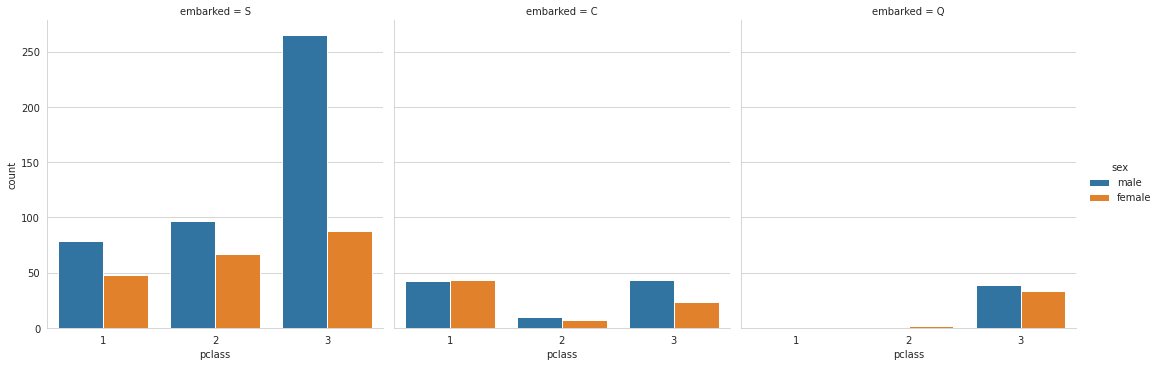

In [281]:
sns.catplot("pclass", col="embarked" , data=data ,hue="sex", kind="count")

This hypothesis appears to be true because most of the people embarking at point C areof first class

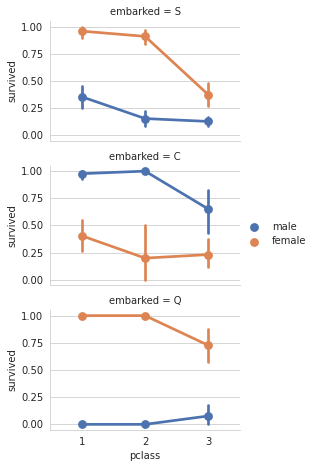

In [282]:
grid = sns.FacetGrid(data , row="embarked" , size=2.2 , aspect=1.6)
grid.map(sns.pointplot ,"pclass" , "survived" , "sex" ,palette="deep")
grid.add_legend()
## shows relationship between the three variables

# Numerial Variable Analysis

### *Correlation analysis*

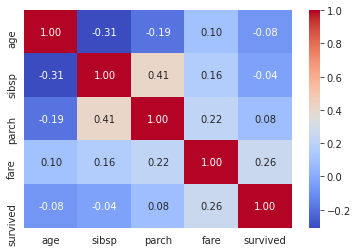

In [283]:
sns.heatmap(data[['age', 'sibsp', 'parch', 'fare',"survived"]].corr(),annot=True , fmt=".2f",cmap="coolwarm")

## Fare seems to be the only feature with substantial correlation with the survival

### *Numerical variable:Sibsp*

In [284]:
data["sibsp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [285]:
data[["sibsp","survived"]].groupby("sibsp",as_index = False ) .mean().sort_values(by="survived",ascending=False)

,sibsp,survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0, 0.5, 'survival probability')

Text(0.5, 1.0, 'Survivel probabilty by SibSp')

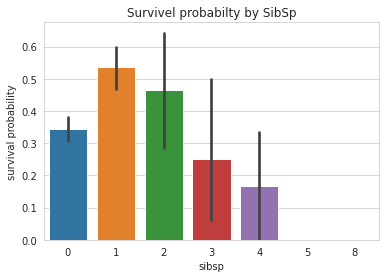

In [286]:
sns.barplot(x="sibsp",y="survived",data=data)
plt.ylabel("survival probability")
plt.title("Survivel probabilty by SibSp")

### *Numerical variable:Parch*

In [287]:
data["parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [288]:
data[["parch","survived"]].groupby("parch",as_index = False ) .mean().sort_values(by="survived",ascending=False)

,parch,survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0, 0.5, 'survival probability')

Text(0.5, 1.0, 'Survivel probabilty by parch')

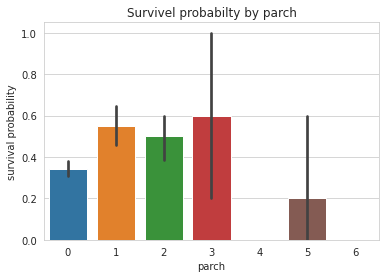

In [289]:
sns.barplot(x="parch",y="survived",data=data)
plt.ylabel("survival probability")
plt.title("Survivel probabilty by parch")

### *Numerical variable:Age*



In [290]:
## Value counts only applies if a variable is discrete for continous variables us  a histogram

Text(0.5, 1.0, 'Passenger Age distribution')

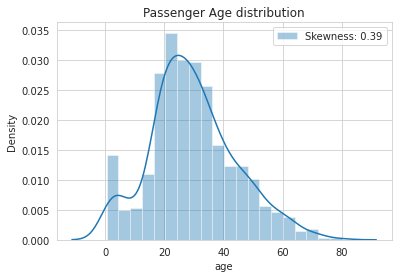

In [291]:
sns.distplot(data["age"],label="Skewness: %.2f"%(data["age"].skew()))
plt.legend(loc="best")
plt.title("Passenger Age distribution")

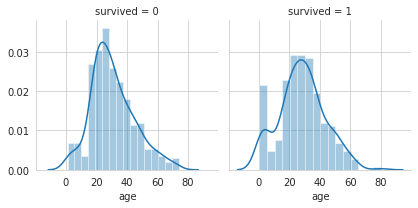

In [292]:
g=sns.FacetGrid(data , col="survived")
g.map(sns.distplot ,"age")

Text(0.5, 0, 'Age')

Text(0.5, 1.0, 'Passenger age distribution by age')

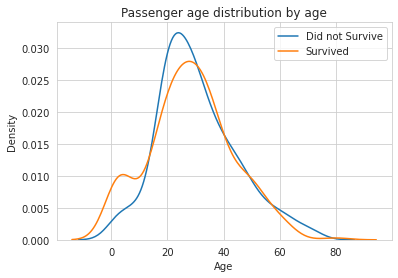

In [293]:
sns.kdeplot(data["age"][data["survived"]== 0] , label = "Did not Survive")
sns.kdeplot(data["age"][data["survived"]== 1] , label = "Survived")
plt.legend(loc="best")
plt.xlabel("Age")
plt.title("Passenger age distribution by age")

### *Numerical variable:Fare*

Text(0.5, 1.0, 'Passenger Fare distribution')

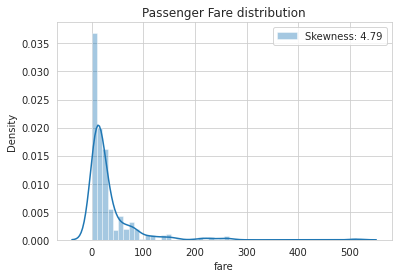

In [294]:
sns.distplot(data["fare"],label="Skewness: %.2f"%(data["fare"].skew()))
plt.legend(loc="best")
plt.title("Passenger Fare distribution")
## Fare seems to have a high skewness. This will be addressed later on in the notebook through log transformation.

# Data Preprocessing

### *Missing Values*

In [295]:
total = data.isnull().sum().sort_values(ascending=False)
percentage = round(data.isnull().sum()/data.shape[0] * 100 , 2)
missing_data = pd.concat([total,percentage], axis=1,keys=["Total","Percentage"])
missing_data[missing_data["Percentage"]>0]

,Total,Percentage
cabin,687,77.10
age,177,19.87
embarked,2,0.22


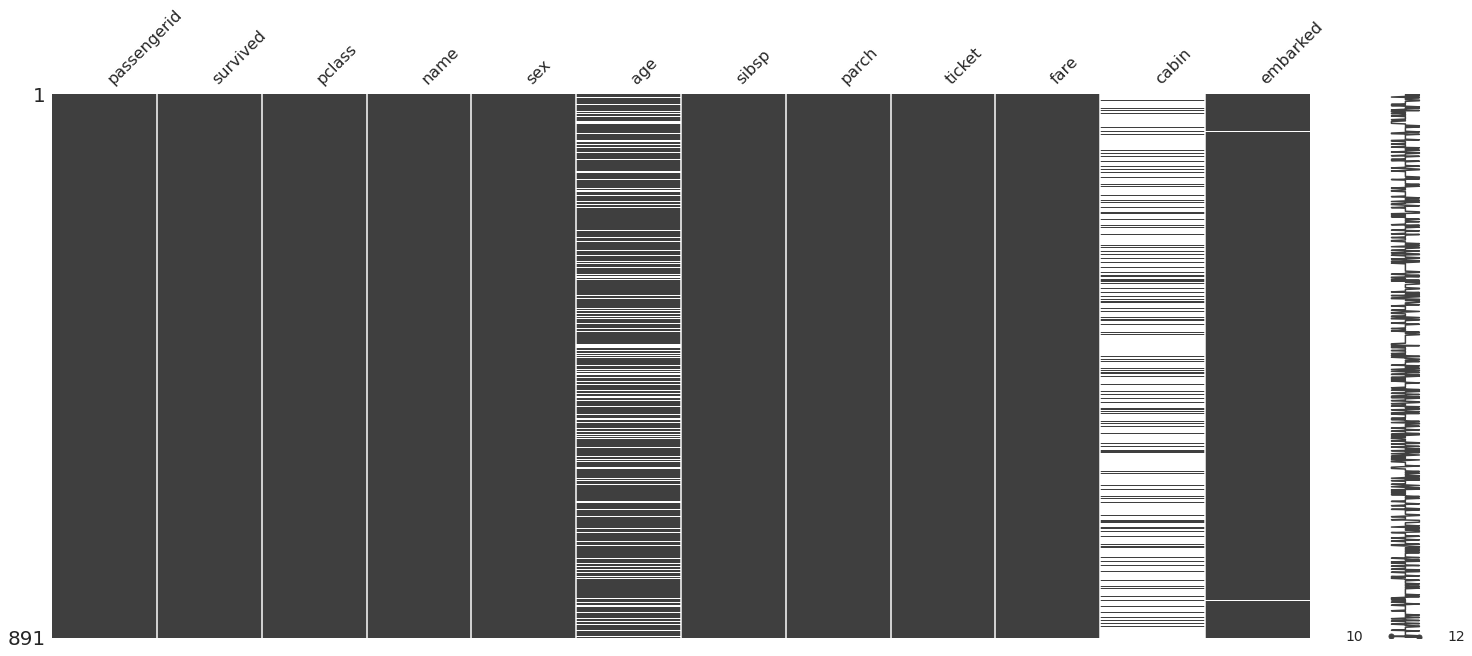

In [296]:
missingno.matrix(data)

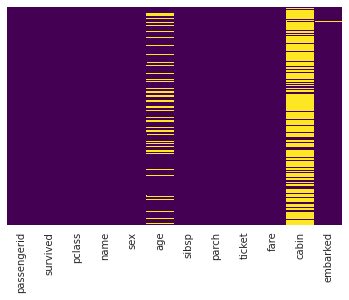

In [297]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

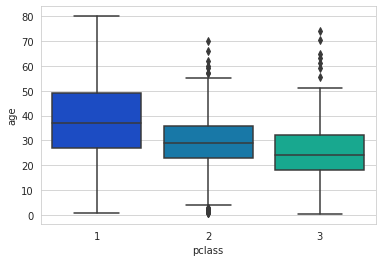

In [298]:
sns.boxplot(x="pclass" , y="age" ,data=data ,palette="winter")
## Generally old people tend to travel in the higher pclass.

In [299]:
##  Filling age values in acordance with passenger class as we saw in the above boxplot.
## pclass1= avg_age=(37) ,pclass2 = avg_age(29) , pclass3 =avg_age(24)

def impute_age(cols):
   age=cols[0]
   pclass=cols[1]

   if pd.isnull(age):
     if pclass == 1:
       return 37            
     elif pclass ==2:
        return 29      
     else:
        return 24
      
   else:
       return age

      



In [300]:
data["age"] = data[["age","pclass"]].apply(impute_age,axis=1)

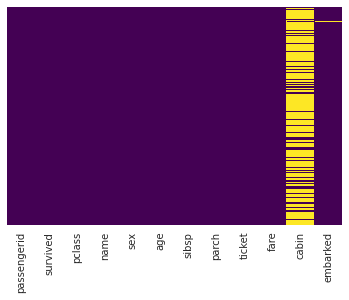

In [301]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [302]:
## Dropping the cabin column since it has 77% null values
data.drop(["cabin"],axis=1,inplace=True)

In [303]:
mode = data["embarked"].dropna().mode()[0]
mode
## getting the mode(stage with the highest frequency) in the embarked column

'S'

In [304]:
## Replacing in null values inembarked column with the most frequent value.
data["embarked"].fillna(mode,inplace=True)

In [305]:
data.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

In [306]:
data.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
dtype: int64

In [307]:
data["embarked"].mode()[0]

'S'

### *Outlier Detection and Removal*

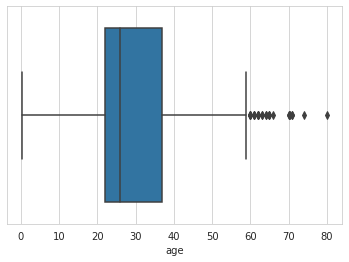

In [308]:
sns.boxplot(x=data["age"])

[Text(0, 0.5, 'Fare'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Age vs Fare')]

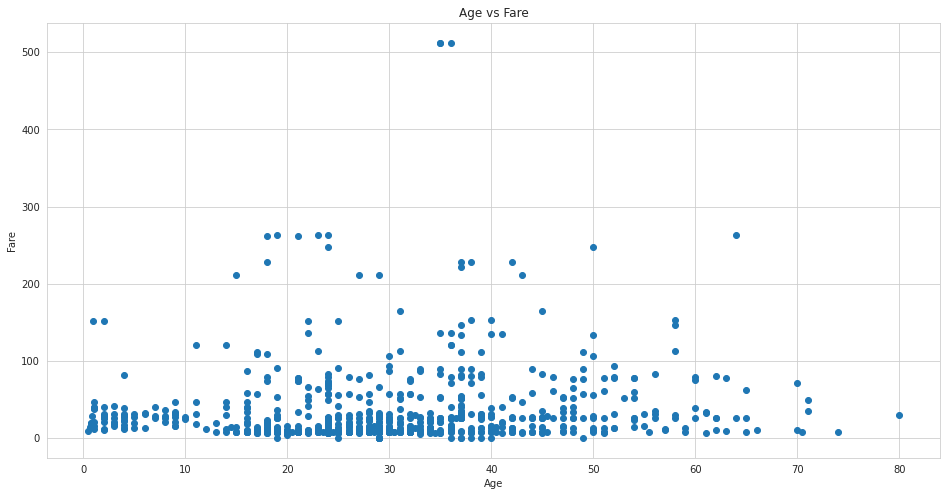

In [309]:
fig , ax =plt.subplots(figsize=(16,8))
ax.scatter(x="age" ,y="fare" , data=data)
ax.set(xlabel="Age",ylabel="Fare",title="Age vs Fare")

In [310]:
data[data["age"]<1]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S


In [311]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(data, 2, ['age', 'sibsp', 'parch', 'fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 13 indices:  [438, 587, 745, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


Code to drop Outliers manually in each column
'' IQR  '''
Q1 = np.percentile(df['age'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['age'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
'' Upper bound '''
upper = np.where(df['age'] >= (Q3+1.5*IQR))
''' Lower bound '''
lower = np.where(df['age'] <= (Q1-1.5*IQR))
  
print("lower",lower[0])
print("Upper",upper[0])

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

df = df.reset_index(drop=True)

```
# This is formatted as code
```



In [312]:
data.loc[outliers_to_drop ,:]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.00,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.20,C
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,S
159,160,0,3,"Sage, Master. Thomas Henry",male,24.0,8,2,CA. 2343,69.55,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,24.0,8,2,CA. 2343,69.55,S
201,202,0,3,"Sage, Mr. Frederick",male,24.0,8,2,CA. 2343,69.55,S
324,325,0,3,"Sage, Mr. George John Jr",male,24.0,8,2,CA. 2343,69.55,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,S


In [313]:
## Dropping the outliers
print("Before: {} rows".format(len(data)))
data = data.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(data)))

Before: 891 rows
After: 878 rows


Combining test set and train set

In [314]:
total = test.isnull().sum().sort_values(ascending=False)
percentage = round(test.isnull().sum()/test.shape[0] * 100 , 2)
missing_data = pd.concat([total,percentage], axis=1,keys=["Total","Percentage"])
missing_data[missing_data["Percentage"]>0]

,Total,Percentage
cabin,327,78.23
age,86,20.57
fare,1,0.24


In [315]:
test.drop(["cabin"],axis=1,inplace=True)
test["age"] = test[["age","pclass"]].apply(impute_age,axis=1)
median = test["fare"].dropna().median()
test.fillna(median,inplace=True)

In [316]:
combine = pd.concat([data,test],axis=0).reset_index(drop=True)
combine.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [317]:
combine.isnull().sum().sort_values(ascending=False)
## Nb all the missing values in the survived column are from the test set so we will ignore

survived       418
embarked         0
fare             0
ticket           0
parch            0
sibsp            0
age              0
sex              0
name             0
pclass           0
passengerid      0
dtype: int64

In [318]:
## Convert sex into a numeric value
combine["sex"] = combine["sex"].map({"male":0,"female":1})

In [319]:
combine["sex"].value_counts()

0    835
1    461
Name: sex, dtype: int64

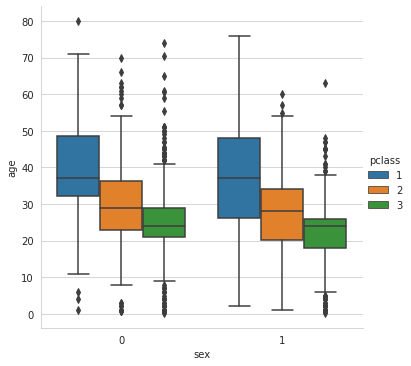

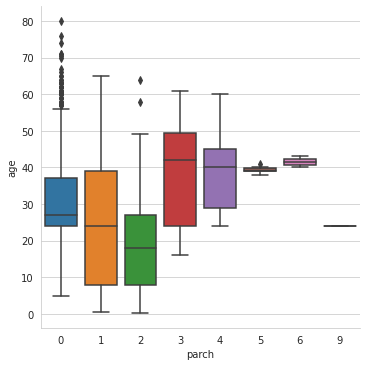

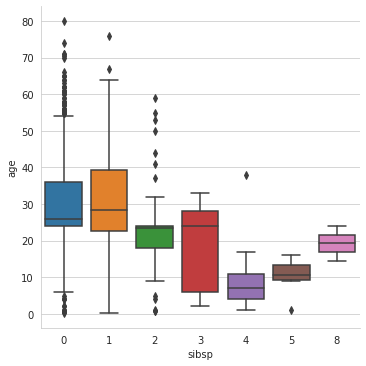

In [320]:
## Vizualizing the relationship between age , parch and sibsp
sns.factorplot(y="age" , x="sex" , hue="pclass" , kind="box" ,data=combine)
sns.factorplot(y="age",x="parch",kind="box",data=combine)
sns.factorplot(y="age",x="sibsp",kind="box" ,data=combine)

In [321]:
combine.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [322]:
combine.drop("ticket",axis=1,inplace=True)

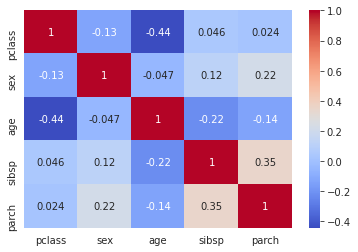

In [323]:
sns.heatmap(combine.drop(['survived', 'name', 'passengerid', 'fare'], axis = 1).corr(), annot = True, cmap = 'coolwarm')

In [324]:
combine["age"].isnull().sum()

0

### *Data Transformation*

Recall that the fare column has a very high skwness that may affect our model so data transformation will be needed.

Text(0.5, 1.0, 'Passenger Fare Distribution')

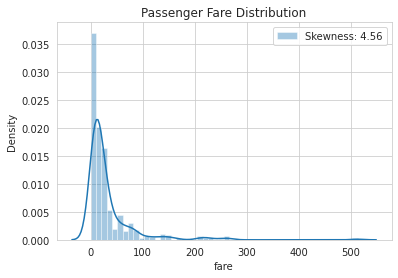

In [325]:
sns.distplot(combine['fare'], label = 'Skewness: %.2f'%(combine['fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [326]:
## Perform log transformation
combine["fare"]= combine["fare"].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution')

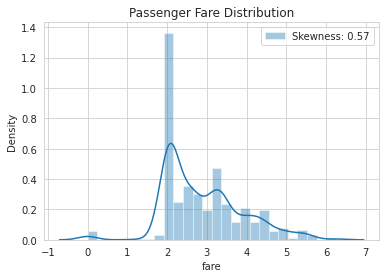

In [327]:
sns.distplot(combine['fare'], label = 'Skewness: %.2f'%(combine['fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')
## As we can see skewness has dropped to 0.57

### *Feature Engineering*

Feature engineering is arguably the most important art in machine learning. It is the process of creating new features from existing features to better represent the underlying problem to the predictive models resulting in improved model accuracy on unseen data.

#### Title

In [328]:
## Creating a column to get the honoric(title) from each name
combine["title"] = [ str(name.split(",")[1].split(".")[0]) for name in combine["name"]]
combine[["name","title"]].head()

,name,title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [329]:
combine["title"].value_counts()

 Mr              751
 Miss            255
 Mrs             197
 Master           60
 Dr                8
 Rev               8
 Col               4
 Major             2
 Mlle              2
 Ms                2
 Lady              1
 Dona              1
 the Countess      1
 Sir               1
 Jonkheer          1
 Mme               1
 Don               1
Name: title, dtype: int64

In [330]:
combine['title'] = combine['title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona',"Rarea"], 'Rare',regex=True)
combine['title'] = combine['title'].replace(['Mlle', 'Ms'], 'Miss',regex=True)
combine['title'] = combine['title'].replace('Mme', 'Mrs',regex=True)
## Replacing the less familiar titles with known ones for better modelling

In [331]:
combine["title"].nunique()

5

In [332]:
combine["title"].value_counts()

 Mr        751
 Miss      259
 Mrs       198
 Master     60
 Rare       28
Name: title, dtype: int64

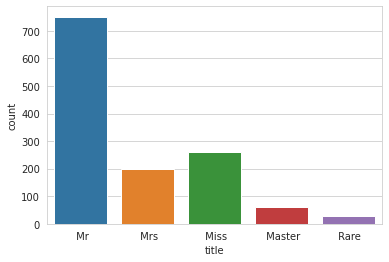

In [333]:
sns.countplot(combine["title"])

In [334]:
combine[['title', 'survived']].groupby(['title'], as_index = False).mean().sort_values(by = 'survived', ascending = False)

,title,survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.363636
2,Mr,0.156556


Text(6.799999999999997, 0.5, 'Survival Probability')

Text(0.5, 1.0, 'Mean of survival by Title')

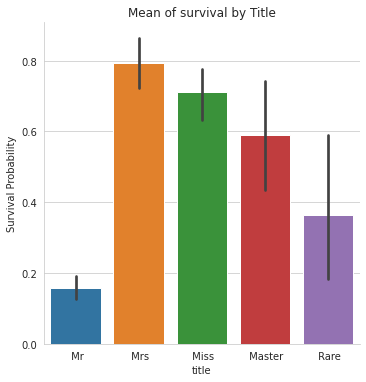

In [335]:
sns.factorplot(x = 'title', y = 'survived', data = combine, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [336]:
combine.drop("name",axis=1,inplace=True)

In [337]:
combine.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked,title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


#### Is Alone

In [338]:
combine["familysize"]=combine["sibsp"]+combine["parch"]+1
combine[["sibsp","parch","familysize"]].head()

,sibsp,parch,familysize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [339]:
combine[["familysize","survived"]].groupby("familysize" , as_index=False).mean().sort_values(by="survived",ascending=False)

,familysize,survived
3,4,0.724138
2,3,0.580000
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.055556
7,8,0.000000
8,11,NaN


In [340]:
combine["isalone"]=0
combine.loc[combine["familysize"]==1,"isalone"] =1

In [341]:
combine[["isalone","survived"]].groupby("isalone" , as_index=False).mean().sort_values(by="survived",ascending=False)
## Probability of surviving when alone is very low 

,isalone,survived
0,0,0.516129
1,1,0.303538


In [342]:
combine.drop(["sibsp","parch","familysize"],axis=1,inplace=True)

In [343]:
combine.head()

,passengerid,survived,pclass,sex,age,fare,embarked,title,isalone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


#### age*Class

In [344]:
combine["ageband"] = pd.cut(combine["age"],5)
combine[["ageband","survived"]].groupby("ageband",as_index=False).mean().sort_values(by="ageband")

,ageband,survived
0,"(0.0902, 16.136]",0.550000
1,"(16.136, 32.102]",0.339545
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.432836
4,"(64.034, 80.0]",0.100000


In [345]:
# Assign ordinals to each age band 

combine.loc[combine['age'] <= 16.136, 'age'] = 0
combine.loc[(combine['age'] > 16.136) & (combine['age'] <= 32.102), 'age'] = 1
combine.loc[(combine['age'] > 32.102) & (combine['age'] <= 48.068), 'age'] = 2
combine.loc[(combine['age'] > 48.068) & (combine['age'] <= 64.034), 'age'] = 3
combine.loc[combine['age'] > 64.034 , 'age'] = 4

In [346]:
combine.head()

,passengerid,survived,pclass,sex,age,fare,embarked,title,isalone,ageband
0,1,0.0,3,0,1.0,1.981001,S,Mr,0,"(16.136, 32.102]"
1,2,1.0,1,1,2.0,4.266662,C,Mrs,0,"(32.102, 48.068]"
2,3,1.0,3,1,1.0,2.070022,S,Miss,1,"(16.136, 32.102]"
3,4,1.0,1,1,2.0,3.972177,S,Mrs,0,"(32.102, 48.068]"
4,5,0.0,3,0,2.0,2.085672,S,Mr,1,"(32.102, 48.068]"


In [347]:
combine[['age', 'pclass']].dtypes

age       float64
pclass      int64
dtype: object

In [348]:
combine['age'] = combine['age'].astype('int')
combine['age'].dtype

dtype('int64')

In [349]:
combine['age*class'] = combine['age'] * combine['pclass']
combine[['age', 'pclass', 'age*class']].head()

,age,pclass,age*class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


In [350]:
combine.drop("ageband",axis=1,inplace=True)

### Feature Encoding

In [351]:
## Encoding embarked and title columns

combine = pd.get_dummies(combine,columns=["title"])
combine = pd.get_dummies(combine,columns=["embarked"],prefix="em")
combine.head()

,passengerid,survived,pclass,sex,age,fare,isalone,age*class,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ Rare,em_C,em_Q,em_S
0,1,0.0,3,0,1,1.981001,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,4.266662,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,2.070022,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,3.972177,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,2.085672,1,6,0,0,1,0,0,0,0,1


In [352]:
# Divide Fare into four bands

combine['fareband'] = pd.cut(combine['fare'], 4)
combine[['fareband', 'survived']].groupby(['fareband'], as_index=False).mean().sort_values(by = 'fareband')

,fareband,survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517123
3,"(4.679, 6.239]",0.765957


In [353]:
# Assign ordinal to each fare band

combine.loc[combine['fare'] <= 1.56, 'fare'] = 0
combine.loc[(combine['fare'] > 1.56) & (combine['fare'] <= 3.119), 'fare'] = 1
combine.loc[(combine['fare'] > 3.119) & (combine['fare'] <= 4.679), 'fare'] = 2
combine.loc[combine['fare'] > 4.679, 'fare'] = 3

In [354]:
# Convert Fare into integer

combine['fare'] = combine['fare'].astype('int')
combine['fare'].dtype

dtype('int64')

In [355]:
combine = combine.drop('fareband', axis = 1)

In [356]:
combine.head()

,passengerid,survived,pclass,sex,age,fare,isalone,age*class,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ Rare,em_C,em_Q,em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [357]:
# Separate training and test set from the combined dataframe

train = combine[:len(data)]
test = combine[len(data):]

In [358]:
train.tail()

,passengerid,survived,pclass,sex,age,fare,isalone,age*class,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ Rare,em_C,em_Q,em_S
873,887,0.0,2,0,1,1,1,2,0,0,0,0,1,0,0,1
874,888,1.0,1,1,1,2,1,1,0,1,0,0,0,0,0,1
875,889,0.0,3,1,1,2,0,3,0,1,0,0,0,0,0,1
876,890,1.0,1,0,1,2,1,1,0,0,1,0,0,1,0,0
877,891,0.0,3,0,1,1,1,3,0,0,1,0,0,0,1,0


In [359]:
test.head()

,passengerid,survived,pclass,sex,age,fare,isalone,age*class,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ Rare,em_C,em_Q,em_S
878,892,NaN,3,0,2,1,1,6,0,0,1,0,0,0,1,0
879,893,NaN,3,1,2,1,0,6,0,0,0,1,0,0,0,1
880,894,NaN,2,0,3,1,1,6,0,0,1,0,0,0,1,0
881,895,NaN,3,0,1,1,1,3,0,0,1,0,0,0,0,1
882,896,NaN,3,1,1,1,0,3,0,0,0,1,0,0,0,1


In [360]:
train = train.drop('passengerid', axis = 1)
train['survived'] = train['survived'].astype('int')
test = test.drop('survived', axis = 1)

In [361]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   survived       878 non-null    int64
 1   pclass         878 non-null    int64
 2   sex            878 non-null    int64
 3   age            878 non-null    int64
 4   fare           878 non-null    int64
 5   isalone        878 non-null    int64
 6   age*class      878 non-null    int64
 7   title_ Master  878 non-null    uint8
 8   title_ Miss    878 non-null    uint8
 9   title_ Mr      878 non-null    uint8
 10  title_ Mrs     878 non-null    uint8
 11  title_ Rare    878 non-null    uint8
 12  em_C           878 non-null    uint8
 13  em_Q           878 non-null    uint8
 14  em_S           878 non-null    uint8
dtypes: int64(7), uint8(8)
memory usage: 55.0 KB


In [362]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 878 to 1295
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   passengerid    418 non-null    int64
 1   pclass         418 non-null    int64
 2   sex            418 non-null    int64
 3   age            418 non-null    int64
 4   fare           418 non-null    int64
 5   isalone        418 non-null    int64
 6   age*class      418 non-null    int64
 7   title_ Master  418 non-null    uint8
 8   title_ Miss    418 non-null    uint8
 9   title_ Mr      418 non-null    uint8
 10  title_ Mrs     418 non-null    uint8
 11  title_ Rare    418 non-null    uint8
 12  em_C           418 non-null    uint8
 13  em_Q           418 non-null    uint8
 14  em_S           418 non-null    uint8
dtypes: int64(7), uint8(8)
memory usage: 26.3 KB


Yeeeeeeiyy, after all the wrangling finally the data is ready for modelling.

# Modelling

Since this is a classifying problem we will use the following classiffication algorithms:-


*   Logistic regression

*   Support vector machines

*   K-nearest neighbours

*   Gaussian naive bayes

*   Perceptron
*   Linear SVC


*   Stochastic gradient descent


*   Decision tree


*   Random forest


*   CatBoost



### Split training data

In [363]:
X_train = train.drop('survived', axis = 1)
Y_train = train['survived']
X_test = test.drop('passengerid', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (878, 14)
Y_train shape:  (878,)
X_test shape:  (418, 14)


### Fit model to data and make predictions

#### Logistic regression

In [364]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

81.09

#### Support vector machines

In [365]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

82.92

#### K-nearest neighbours (KNN)

In [366]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

84.97

#### Gaussian naive bayes

In [367]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

GaussianNB(priors=None, var_smoothing=1e-09)

79.27

#### Perceptron

In [368]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

74.26

#### Linear SVC

In [369]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

80.75

#### Stochastic gradient descent

In [370]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

74.83

#### Decision tree

In [371]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

85.65

#### Random forest

In [372]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

85.65

#### CatBoost

In [373]:
catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)

Learning rate set to 0.009746
0:	learn: 0.6869047	total: 999us	remaining: 999ms
1:	learn: 0.6799411	total: 2.13ms	remaining: 1.06s
2:	learn: 0.6737262	total: 3.2ms	remaining: 1.06s
3:	learn: 0.6677189	total: 4.45ms	remaining: 1.11s
4:	learn: 0.6615536	total: 5.68ms	remaining: 1.13s
5:	learn: 0.6561385	total: 6.88ms	remaining: 1.14s
6:	learn: 0.6506779	total: 7.98ms	remaining: 1.13s
7:	learn: 0.6444303	total: 9.05ms	remaining: 1.12s
8:	learn: 0.6404703	total: 10.1ms	remaining: 1.11s
9:	learn: 0.6355652	total: 11ms	remaining: 1.09s
10:	learn: 0.6312333	total: 11.9ms	remaining: 1.07s
11:	learn: 0.6267129	total: 12.9ms	remaining: 1.06s
12:	learn: 0.6217110	total: 13.9ms	remaining: 1.05s
13:	learn: 0.6173668	total: 14.8ms	remaining: 1.04s
14:	learn: 0.6118021	total: 15.8ms	remaining: 1.04s
15:	learn: 0.6065863	total: 16.9ms	remaining: 1.04s
16:	learn: 0.6030547	total: 17.7ms	remaining: 1.02s
17:	learn: 0.5980537	total: 18.8ms	remaining: 1.03s
18:	learn: 0.5933002	total: 20.1ms	remaining: 1.

In [374]:
acc_catboost

85.42

### Model evaluation and hyperparameter tuning

Once all our models have been trained, the next step is to assess the performance of these models and select the one which has the highest prediction accuracy.

#### Training accuracy

In [375]:
models = pd.DataFrame(    
      {
          'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost]
       }    
)

In [376]:
models.sort_values(by="Score", ascending=False , ignore_index=True)

,Model,Score
0,Random Forest,85.65
1,Decision Tree,85.65
2,CatBoost,85.42
3,KNN,84.97
4,Support Vector Machines,82.92
5,Logistic Regression,81.09
6,Linear SVC,80.75
7,Naive Bayes,79.27
8,Stochastic Gradient Decent,74.83
9,Perceptron,74.26


### K-fold cross validation

It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before..K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes.

In [377]:
# Create a list which contains classifiers 
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [378]:
# Create a list which contains cross validation results for each classifier
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6635793	total: 5.18ms	remaining: 1.03s
5:	learn: 0.6580521	total: 6.24ms	remaining: 1.03s
6:	learn: 0.6528012	total: 7.34ms	remaining: 1.04s
7:	learn: 0.6467074	total: 8.4ms	remaining: 1.04s
8:	learn: 0.6428845	total: 9.24ms	remaining: 1.02s
9:	learn: 0.6373686	total: 10.2ms	remaining: 1.01s
10:	learn: 0.6323643	total: 11.3ms	remaining: 1.01s
11:	learn: 0.6285801	total: 12.3ms	remaining: 1.01s
12:	learn: 0.6242384	total: 13.2ms	remaining: 1s
13:	learn: 0.6193354	total: 14.3ms	remaining: 1s
14:	learn: 0.6143117	total: 15.3ms	remaining: 1.01s
15:	learn: 0.6115899	total: 16ms	remaining: 985ms
16:	learn: 0.6066825	total: 17ms	remaining: 983ms
17:	learn: 0.6028945	total: 18ms	remaining: 983ms
18:	learn: 0.5988272	total: 19.1ms	remaining: 986ms
19:	learn: 0.5949178	total: 20ms	remaining: 979ms
20:	learn: 0.5901504	total: 21ms	remaining: 979ms
21:	learn: 0.5876577	total: 21.7ms	remaining: 966ms
22:	learn: 0.5830149	total: 22.7ms	r

In [379]:
cv_results

[array([0.78409091, 0.81818182, 0.76136364, 0.875     , 0.82954545,
        0.80681818, 0.79545455, 0.79545455, 0.81609195, 0.82758621]),
 array([0.81818182, 0.85227273, 0.72727273, 0.88636364, 0.81818182,
        0.77272727, 0.80681818, 0.75      , 0.85057471, 0.83908046]),
 array([0.78409091, 0.81818182, 0.70454545, 0.81818182, 0.85227273,
        0.76136364, 0.80681818, 0.82954545, 0.86206897, 0.86206897]),
 array([0.76136364, 0.80681818, 0.72727273, 0.86363636, 0.77272727,
        0.78409091, 0.77272727, 0.71590909, 0.85057471, 0.77011494]),
 array([0.71590909, 0.75      , 0.57954545, 0.65909091, 0.79545455,
        0.38636364, 0.64772727, 0.67045455, 0.44827586, 0.82758621]),
 array([0.78409091, 0.81818182, 0.76136364, 0.85227273, 0.80681818,
        0.79545455, 0.78409091, 0.76136364, 0.85057471, 0.83908046]),
 array([0.75      , 0.67045455, 0.75      , 0.73863636, 0.76136364,
        0.72727273, 0.72727273, 0.73863636, 0.83908046, 0.87356322]),
 array([0.76136364, 0.79545455, 0.

In [380]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [381]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.812147,0.046948,Support Vector Machines
1,0.810959,0.029123,Logistic Regression
2,0.809914,0.046790,KNN
3,0.808751,0.041506,CatBoost
4,0.805329,0.032285,Linear SVC
5,0.803004,0.027102,Random Forest
6,0.790491,0.031478,Decision Tree
7,0.782524,0.044818,Gausian Naive Bayes
8,0.757628,0.055108,Stochastic Gradient Descent
9,0.648041,0.135154,Perceptron


Text(0, 0.5, 'Algorithm')

Text(0.5, 1.0, 'Cross Validation Scores')

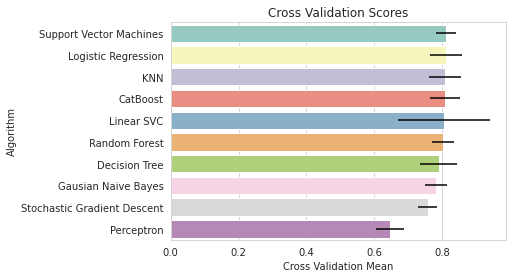

In [382]:
sns.barplot("Cross Validation Mean" ,"Algorithm",data=cv_res ,order=cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'],palette = 'Set3',**{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

As we can see, support vector machines has the highest cross validation mean and thus we will proceed with this model.

### Hyperparameter tuning for SVM

Hyperparameter tuning is the process of tuning the parameters of a model. Here I will tune the parameters of support vector classifier using GridSearchCV.

In [383]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.767, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.778, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.727, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.720, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.749, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.818, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.818, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.784, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.771, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.817, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.699, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.761, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.727, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [384]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [385]:
# Training accuracy using the best parameters

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

83.6

In [386]:
cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.8326933124346917

Our mean cross validation score improved slightly.

In [387]:
# Survival predictions by support vector classifier

Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Preparing data for submission

In [388]:
ss.head()

,passengerid,survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [389]:
ss.shape

(418, 2)

In [390]:
# Create submission dataframe

submit = pd.DataFrame({'PassengerId': test['passengerid'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
878,892,0
879,893,0
880,894,0
881,895,0
882,896,1


In [391]:
submit.shape

(418, 2)

Hurraaay !!!! The data is ready for submission

In [392]:
# Create and save csv file 

submit.to_csv("./final_submission.csv",index=False)